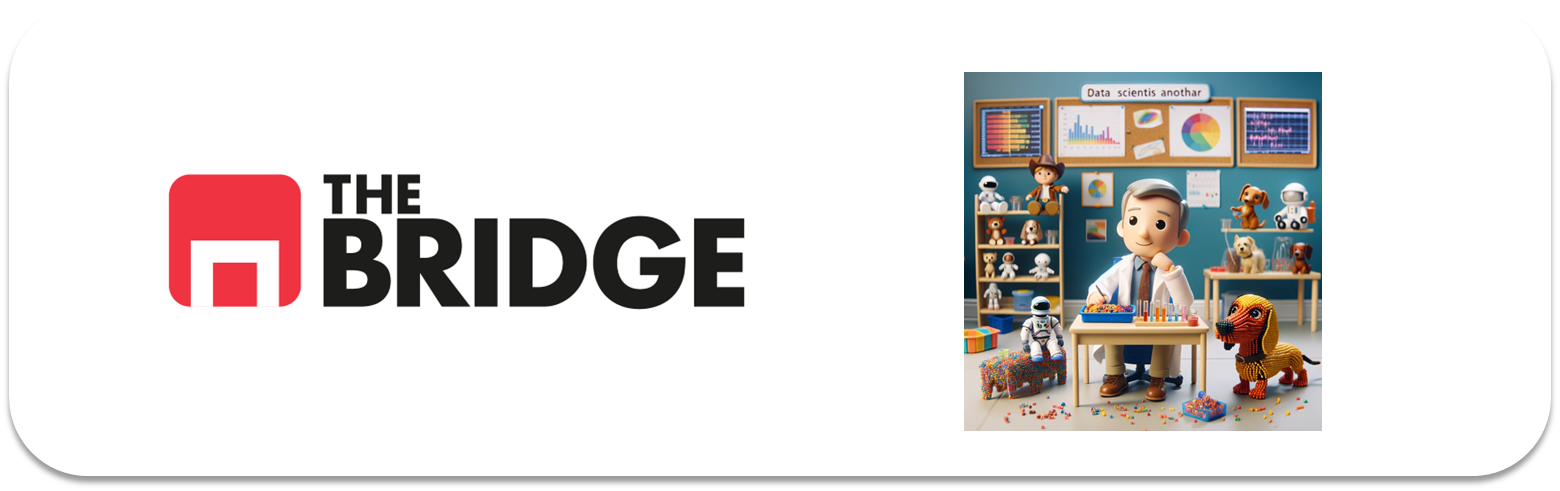

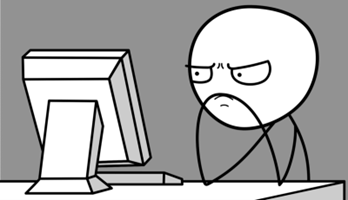

Para ejercitarte y afianzar lo aprendido sobre dispersión, distribución y outliers, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("/Users/aliciamarzoa/Will/the_bridge/personal_projects/functions/")
import eda

### Ejercicio 1

Carga en un dataframe los datos contenidos en la ruta "./data/car_crashes.csv", muestra un parte de su contenido y la info general del mismo

In [2]:
crashesDF = pd.read_csv("./data/car_crashes.csv", sep='|')

In [3]:
crashesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51 non-null     int64  
 1   total           51 non-null     float64
 2   speeding        51 non-null     float64
 3   alcohol         51 non-null     float64
 4   not_distracted  51 non-null     float64
 5   no_previous     51 non-null     float64
 6   ins_premium     51 non-null     float64
 7   ins_losses      51 non-null     float64
 8   abbrev          51 non-null     object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.7+ KB


In [4]:
crashesDF.head()

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [5]:
crashesDF.drop(columns='Unnamed: 0', inplace=True)

In [6]:
crashesDF.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [7]:
crashesDF.set_index('abbrev', drop=True, inplace=True)
crashesDF.reset_index(names='state', inplace=True)

In [8]:
crashesDF.head()

,state,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
1,AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
2,AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35
3,AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39
4,CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63


### Ejercicio 2

Haz una pequeña descripción de lo que crees que puede representar cada una de las variables y de que puede representar el dataset. Aunque para algunas se proporciona aquí:

* "total" - Número de accidentes fatales por colisión de vehiculos por mil millones de millas
* "ins_premiums" - Prima media de Seguros de Automóviles ($)
* "ins_losses" - Pérdidas incurridas por las compañías de seguros por colisiones por conductor asegurado ($)

**ACLARACION IMPORTANTE**: El resto de columnas están dadas en las mismas unidades que total (numero de accidentes fatales por mil millones de millas)


|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|abbrev|State in USA|Categorical||
|total|Número de accidentes fatales por colisión de vehiculos por mil millones de millas|Numerica Continua||
|speeding|Número de accidentes fatales por colisión de vehiculos conduicidos a sobre velocidad por mil millones de millas|Numerica Continua||
|alcohol|Número de accidentes fatales por colisión de vehiculos conduicidos personas bajo la influencia de alcohol por mil millones de millas|Numerica Continua||
|not_distracted|Número de accidentes fatales por colisión de vehiculos en las cuales el conductor no estaba distraido por mil millones de millas|Numerica Continua||
|no_previous|Número de accidentes fatales por colisión de vehiculos conduicidos por personas sin previo de colisíon por mil millones de millas|Numerica Continua||
|ins_premium|Prima media de Seguros de Automóviles ($)|Numerica Continua||
|ins_losses|Pérdidas incurridas por las compañías de seguros por colisiones por conductor asegurado ($)|Numerica Continua||

In [9]:
eda.cardinalidad(crashesDF, 5, 15)

,Card,%_Card,Clasification
state,51,100.000000,Numerica Continua
total,45,88.235294,Numerica Continua
speeding,50,98.039216,Numerica Continua
alcohol,50,98.039216,Numerica Continua
not_distracted,50,98.039216,Numerica Continua
no_previous,50,98.039216,Numerica Continua
ins_premium,51,100.000000,Numerica Continua
ins_losses,51,100.000000,Numerica Continua


### Ejercicio 3

Vamos a analizar las medidas de tendencia central (media, mediana), las de posición (los cuartiles) y los rangos de las variables numéricas del dataset. Muestra esos valores para todas las variables numéricas del dataset.  

**IMPORTANTE**:
*Al ser los valores porcentajes, tenemos que convertirlos a valores absolutos (multiplicar los valores de las columnas de cada fila por el total de esa fila, excepto total) si queremos poder contabilizar medias reales entre todos los estados*  


In [10]:
crashesDF.head()

,state,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
1,AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
2,AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35
3,AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39
4,CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63


In [11]:
crashesDF['speeding%'] = crashesDF['speeding']/crashesDF['total']*100
crashesDF['alcohol%'] = crashesDF['alcohol']/crashesDF['total']*100
crashesDF['not_distracted%'] = crashesDF['not_distracted']/crashesDF['total']*100
crashesDF['no_previous%'] = crashesDF['no_previous']/crashesDF['total']*100

In [12]:
#reorder columns

In [13]:
crashesDF.head()

,state,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,speeding%,alcohol%,not_distracted%,no_previous%
0,AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08,39.0,30.0,96.0,80.0
1,AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,41.0,25.0,90.0,94.0
2,AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35,35.0,28.0,84.0,96.0
3,AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39,18.0,26.0,94.0,95.0
4,CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63,35.0,28.0,91.0,89.0


In [14]:
crashes_central_trends = eda.get_central_tends(crashesDF)

In [15]:
crashes_central_trends

,measure,count,mean,std,min,25%,50%,75%,max,IQR,range
0,total,51.0,15.79,4.12,5.90,12.75,15.60,18.50,23.90,5.75,18.00
1,speeding,51.0,5.00,2.02,1.79,3.77,4.61,6.44,9.45,2.67,7.66
2,alcohol,51.0,4.89,1.73,1.59,3.89,4.55,5.60,10.04,1.71,8.44
3,not_distracted,51.0,13.57,4.51,1.76,10.48,13.86,16.14,23.66,5.66,21.90
4,no_previous,51.0,14.00,3.76,5.90,11.35,13.78,16.76,21.28,5.41,15.38
5,ins_premium,51.0,886.96,178.30,641.96,768.43,858.97,1007.94,1301.52,239.51,659.56
6,ins_losses,51.0,134.49,24.84,82.75,114.64,136.05,151.87,194.78,37.23,112.03
7,speeding%,51.0,31.73,9.63,13.00,23.00,34.00,38.00,54.00,15.00,41.00
8,alcohol%,51.0,30.69,5.13,16.00,28.00,30.00,33.00,44.00,5.00,28.00
9,not_distracted%,51.0,85.92,15.16,10.00,83.00,88.00,95.00,100.00,12.00,90.00


### Ejercicio 4

¿Qué puedes decir de la variable abbrev?¿Qué crees que podríamos hacer con ella?¿Le cambiarías el nombre?

Its a categorical variable, but works well as an index. Renamed to state already

Nota: Para los siguientes ejercicios te convendrá hacerte una función que obtenga el CV (Coeficiente de variación), y guardárla para el futuro

### Ejercicio 5

Analiza `speeding` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

In [16]:
eda.variabilidad(crashesDF, 'speeding%')

'Variabilidad speeding%: 0.30364979189896474'

<Axes: >

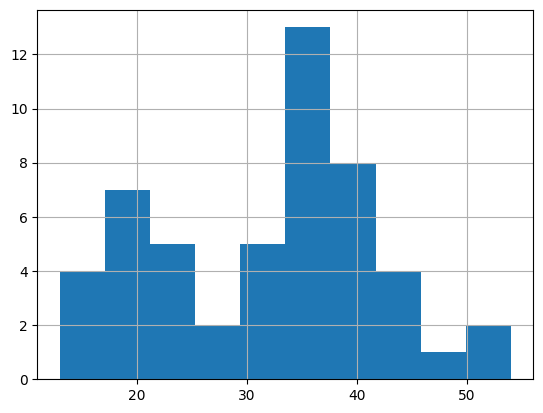

In [17]:
crashesDF['speeding%'].hist()

(2,)


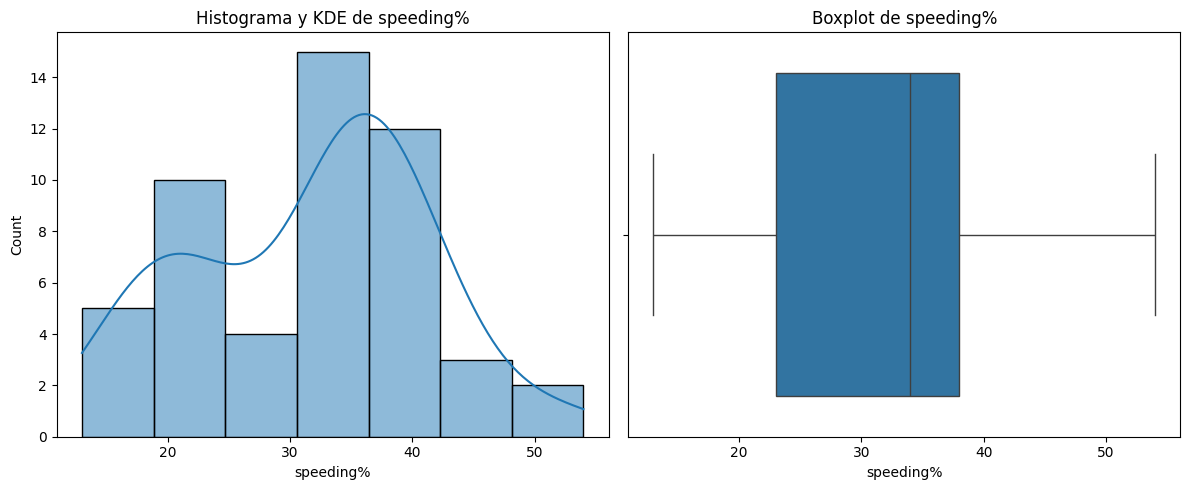

In [18]:
eda.plot_combined_graphs(crashesDF, ['speeding%'])

### Ejercicio 6

Analiza `alcohol` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

In [19]:
eda.variabilidad(crashesDF, 'alcohol%')

'Variabilidad alcohol%: 0.16724782805446317'

(2,)


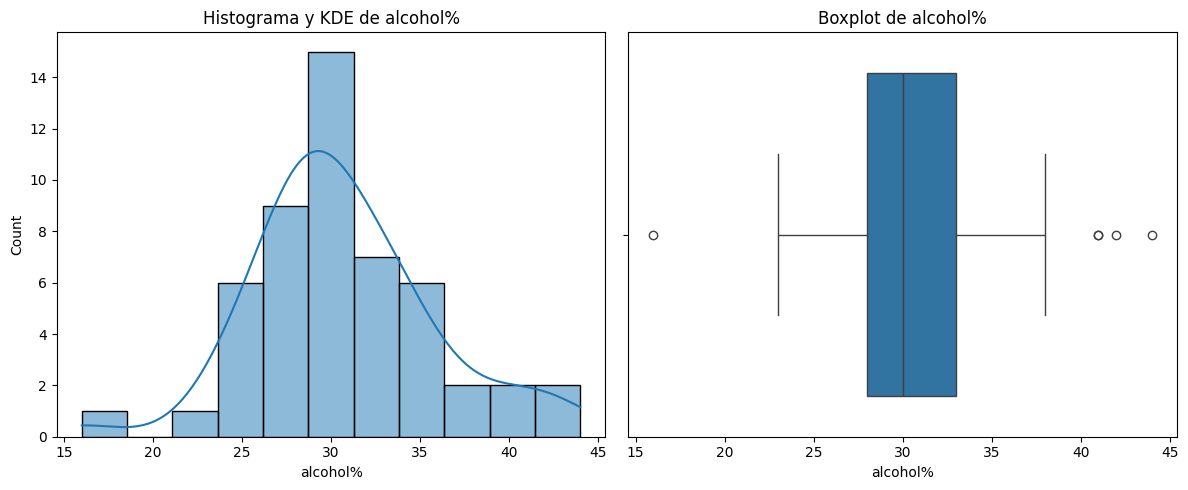

In [20]:
eda.plot_combined_graphs(crashesDF, ['alcohol%'])

### Ejercicio 7

Analiza `not_distracted` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

In [21]:
eda.variabilidad(crashesDF, 'not_distracted%')

'Variabilidad not_distracted%: 0.17642774608972783'

(2,)


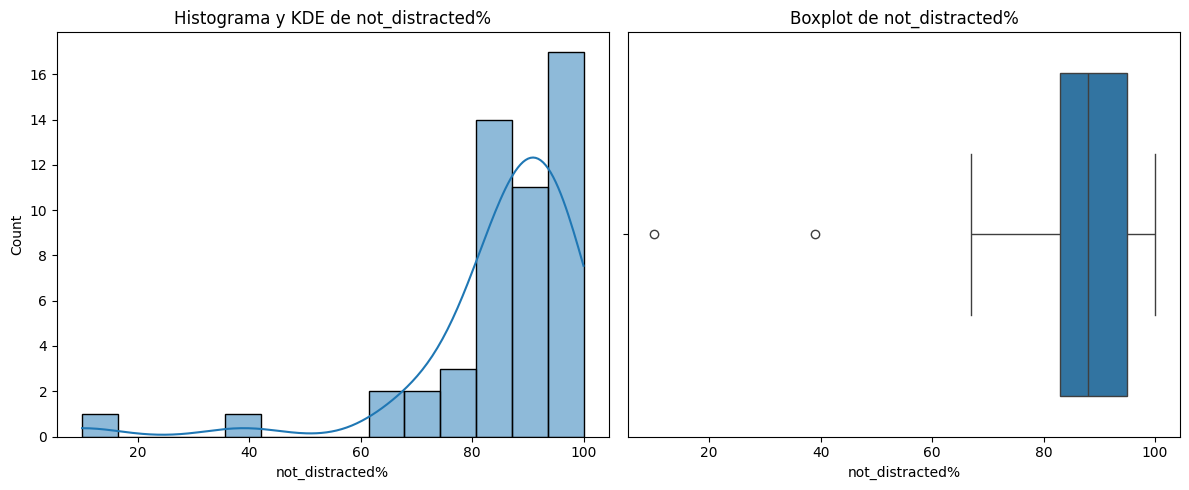

In [22]:
eda.plot_combined_graphs(crashesDF, ['not_distracted%'])

### Ejercicio 8

El diagrma de violín es un tipo de gráfico que no hemos usado pero que tu puedes usar para tu análisis. Combina elementos de diagrama de caja y de la estimación de la función de densidad. 

Ejecuta la siguiente celda y luego dibuja el boxplot y el histograma combinado con la función de densidad para ver qué te parece más interesante. Usa `plot_combined_graphs`) from bootcampviztools import mostrar_diagramas_violin


In [23]:
from bootcampviztools import mostrar_diagramas_violin


La figura presenta un plotbox interno con la mediana marcada con una línea gruesa y el rango intercuartílico dibujado en el centro, además de que la forma se lo da la función densidad estimada (replicada simétricamente):

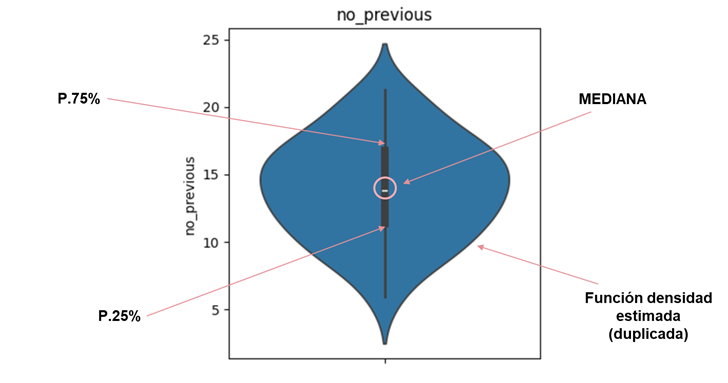

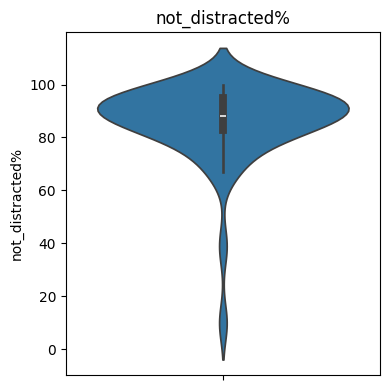

In [24]:
mostrar_diagramas_violin(crashesDF, ['not_distracted%'])

### Ejercicio 9

Completa el análisis de "no_previous" con su CV y sus medidas de tendencia central. ¿Qué destacarías? (considera gráficas y medidas obtenidas en este apartado)

Variabilidad no_previous%: 0.07844544356667972
Axes(0.125,0.11;0.775x0.77)
(2,)


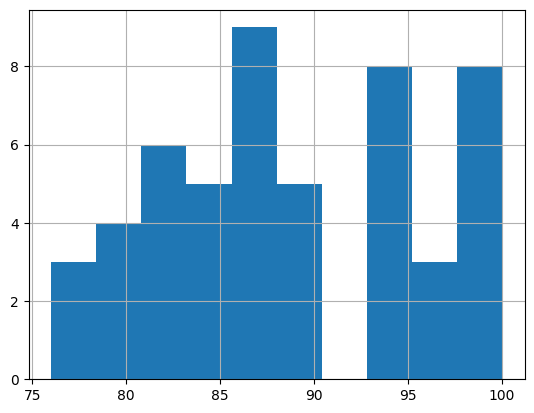

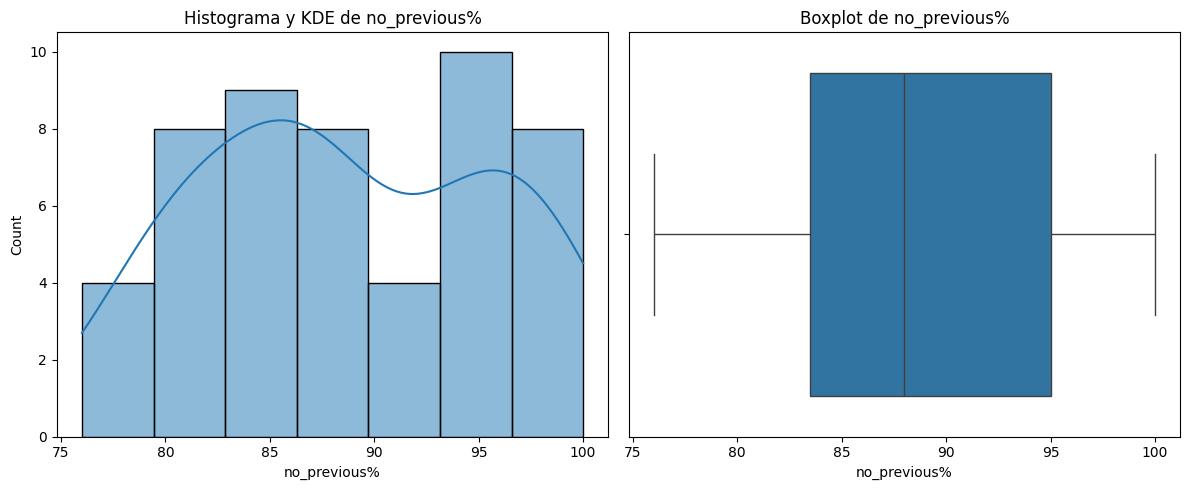

None


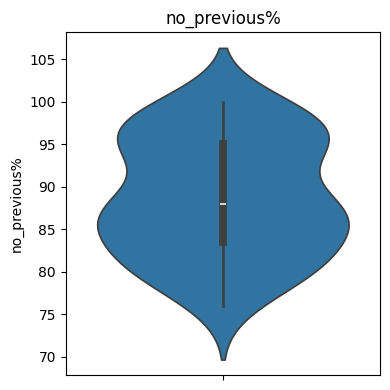

None


In [25]:
print(eda.variabilidad(crashesDF, 'no_previous%'))
print(crashesDF['no_previous%'].hist())
print(eda.plot_combined_graphs(crashesDF, ['no_previous%']))
print(mostrar_diagramas_violin(crashesDF, ['no_previous%']))

### Ejercicio 10

Carga el dataset de los seguros ("./data/Marketing-Customer-Analysis.csv") en un datafame y pinta la gráfica de caja y el histograma de "customer_lifetime_value"

In [26]:
mcaDF = pd.read_csv("./data/Marketing-Customer-Analysis.csv")

(2,)


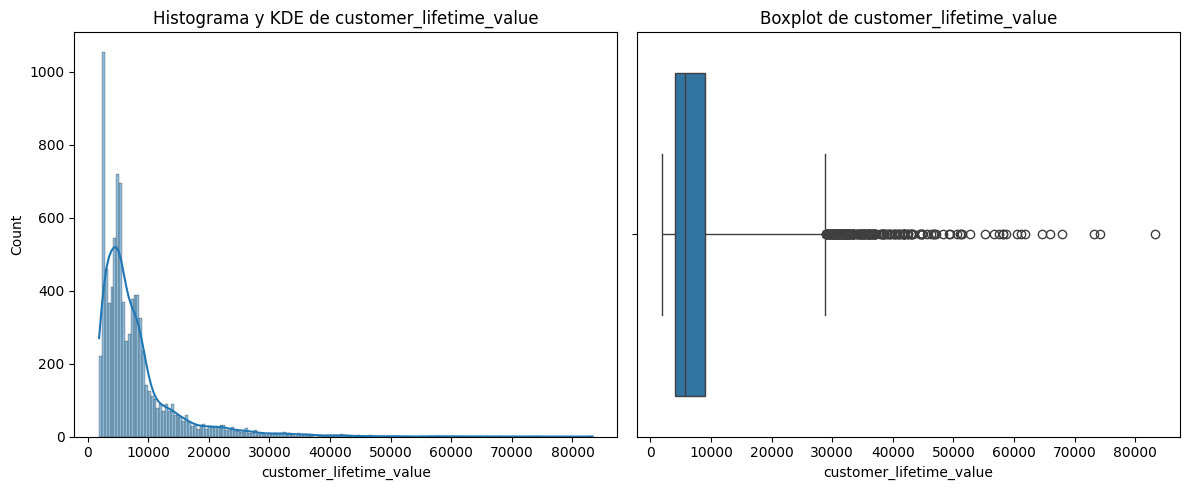

In [27]:
eda.plot_combined_graphs(mcaDF, ['customer_lifetime_value'], whisker_width=4)


### Ejercicio 11

Para "customer_lifetime_value", escoge un umbral para marcar como outliers los valores que lo superen. Divide el dataframe en dos usando ese valor.

In [28]:
mca_central_trends = eda.get_central_tends(mcaDF)

In [29]:
mca_central_trends

,measure,count,mean,std,min,25%,50%,75%,max,IQR,range
0,customer_lifetime_value,9134.0,8004.94,6870.97,1898.01,3994.25,5780.18,8962.17,83325.38,4967.92,81427.37
1,income,9134.0,37657.38,30379.90,0.00,0.00,33889.50,62320.00,99981.00,62320.00,99981.00
2,monthly_premium_auto,9134.0,93.22,34.41,61.00,68.00,83.00,109.00,298.00,41.00,237.00
3,months_since_last_claim,9134.0,15.10,10.07,0.00,6.00,14.00,23.00,35.00,17.00,35.00
4,months_since_policy_inception,9134.0,48.06,27.91,0.00,24.00,48.00,71.00,99.00,47.00,99.00
5,number_of_open_complaints,9134.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00,0.00,5.00
6,number_of_policies,9134.0,2.97,2.39,1.00,1.00,2.00,4.00,9.00,3.00,8.00
7,total_claim_amount,9134.0,434.09,290.50,0.10,272.26,383.95,547.51,2893.24,275.26,2893.14


In [30]:
mca_less30 = mcaDF[mcaDF['customer_lifetime_value'] < 30000]
mca_more30 = mcaDF[mcaDF['customer_lifetime_value'] >= 30000]

### Ejericicio 12

Compara los histogramas para "customer_lifetime_value" de cada dataframe. ¿Qué conclusiones sacas?

LCV full data:


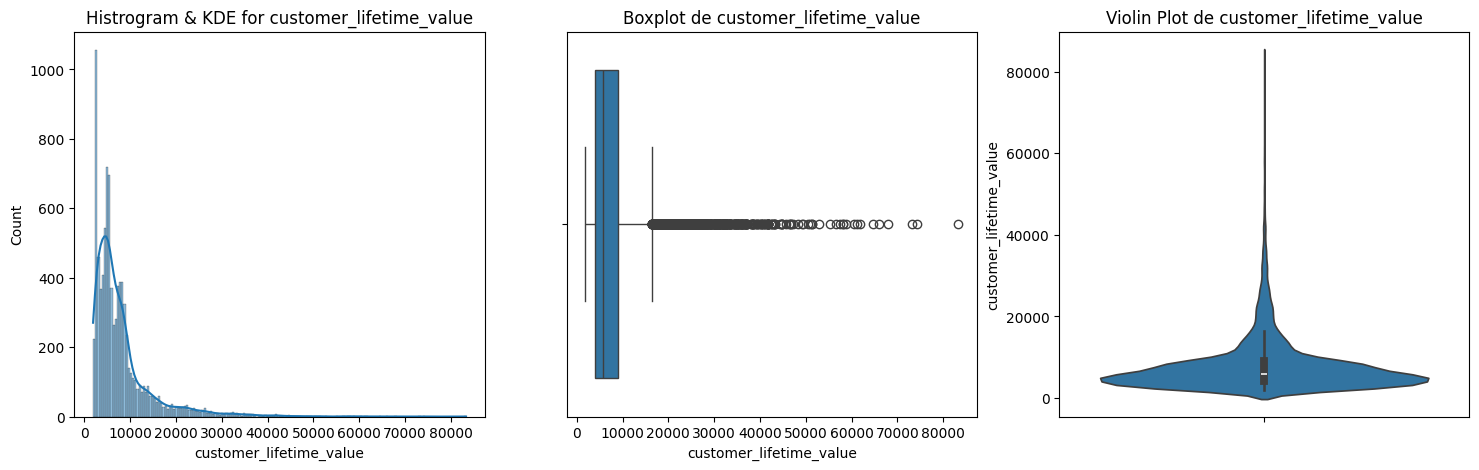

None
LCV less than 30K:


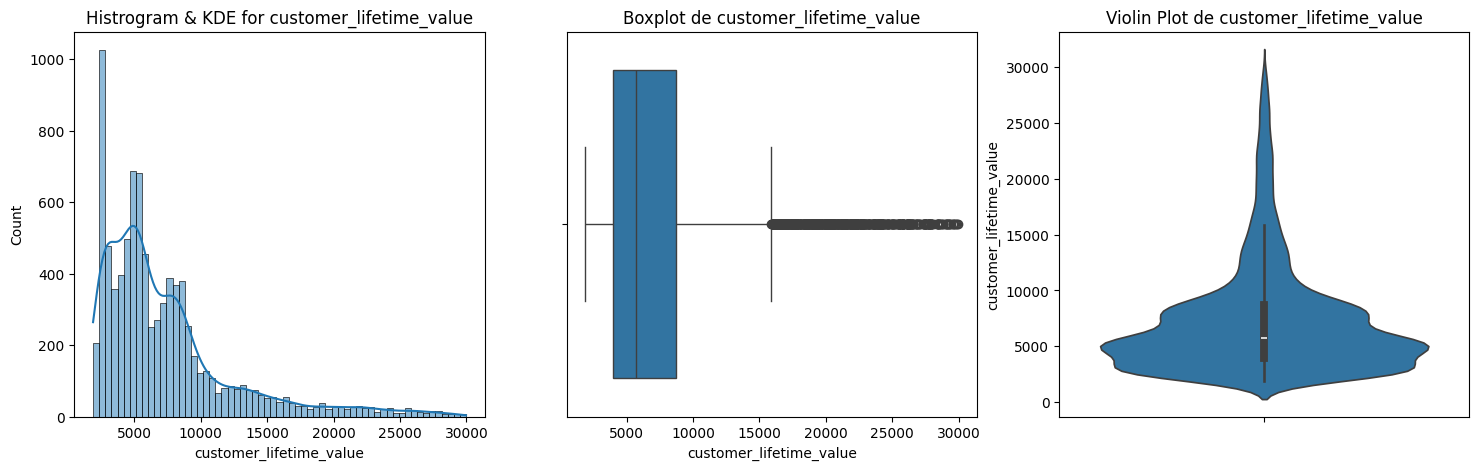

None
LCV more than 30K:


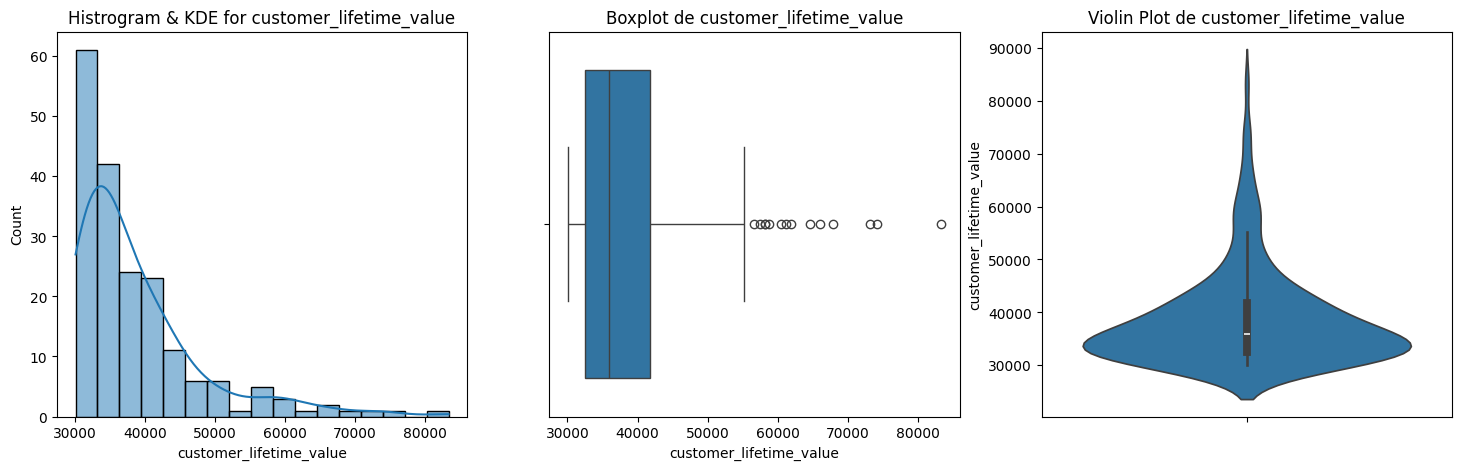

None


In [35]:
print("LCV full data:")
print(eda.plot_3_graphs(mcaDF, ['customer_lifetime_value']))
print("LCV less than 30K:")
print(eda.plot_3_graphs(mca_less30, ['customer_lifetime_value']))
print("LCV more than 30K:")
print(eda.plot_3_graphs(mca_more30, ['customer_lifetime_value']))
